<img style="center" width="300" src="static/images/logo-training.png" />

<h1  style="text-align:center"> Notebook #1 </h1>

<h2> Data Science for mortals </h2>
<p>
This notebook aims to guide you throught your first steps in the world of Data Science.
<span style="color:white">This is an easter egg</span>
<br />
The general concept of a Data Science project will be presented. After a brief introduction, the dataset will be presented. The goal of this notebook is to produce insights that will help us better understand the data.
</p>
<p>
The final goal of any Data Science project is to <em>automatically product data from existing data</em> in order to achive a defined goal. 
</p>

<p>
The figure below shows how a typical data science project evolves. 
</p>
<img src="https://www.mcgill.ca/datascience/files/datascience/styles/wysiwyg_extra_large/public/steps_1.jpg?itok=1-qto_iw"></img>

<p>
    This notebook will only focus on the first step, <em>Data Exploration</em> : in order to perform our prediction (either a customer will generate revenue for your retail website or not), we must familiarize ourselves not only with the data but with the whole retail universe. This means that their is no magic involved in a Data Science project ; <b>business knowledge is critical</b> to achieve any serious Data Science task. <br>
</p>

In [1]:
import pandas as pd
import seaborn
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (16, 4)

/usr/local/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/local/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


<h3>Data Loading</h3>
<p>The cell below will load the data set and display its first rows</p>

In [2]:
dataset = pd.read_csv("./data/customerLifetimeValue.csv", sep=";")
dataset.head()

,customer_id,since_birth_parsed_days,price_first_item_purchased,gender,revenue,ip_country,ip_geopoint,ip_latitude,ip_longitude,pages_visited,campain,Country,GDP_cap
0,10863d9892,39,44.0,M,156,Spain,POINT(2.159 41.3888),41.3888,2.1590,6.0,False,spain,30058.0
1,21ec3b27e4,31,117.0,F,360,United States,POINT(-97.822 37.751),37.7510,-97.8220,5.0,False,united states,51704.0
2,9a8ba01761,35,44.0,M,188,Germany,POINT(7.6833 50.1),50.1000,7.6833,5.0,False,germany,38666.0
3,251ad74e43,31,57.0,F,343,United States,POINT(-84.5075 38.0287),38.0287,-84.5075,6.0,False,united states,51704.0
4,845b601310,45,22.0,F,88,Brazil,POINT(-43.2192 -22.8305),-22.8305,-43.2192,7.0,False,brazil,11747.0


<span>Some basic statistics can also be computed and shown with the following expression : </span>

In [3]:
dataset.describe()

,since_birth_parsed_days,price_first_item_purchased,revenue,ip_latitude,ip_longitude,pages_visited,GDP_cap
count,29299.000000,29299.000000,29299.000000,29243.000000,29243.000000,29299.000000,28322.000000
mean,51.115669,40.600908,177.451654,34.955954,-9.362154,6.036145,36462.401208
std,28.417943,27.251376,69.052396,18.624989,88.221623,2.518203,16708.090946
min,-26.000000,10.000000,28.000000,-53.787700,-172.333300,1.000000,665.000000
25%,32.000000,22.000000,133.000000,33.596400,-92.895300,4.000000,20562.000000
50%,41.000000,42.000000,172.000000,37.751000,-1.162800,6.000000,38666.000000
75%,58.000000,44.000000,217.000000,43.631900,54.000000,7.000000,51704.000000
max,117.000000,117.000000,549.000000,69.666700,176.204400,14.000000,100889.000000


<p>
    At this point, the simpliest and the most common way of starting the exploration phase is to perform an <em>univariate analysis</em> : we will try to establish simple correlations between our variables - or features  (price of first item, number of pages visited) - and the target (revenue).

<br>

The way of proceeding is simple, let's ask ourselves the following question :  <b>how the target behaves when we split our dataset depending on the value a feature ?</b>
</p>

<p>
    Before answering this question, a distinction must be made. There are two kind of variables : <br>
    Ones are quantitavite and called <em>numerical</em> (the price of the first item for exemple) and others are qualitative and called <em>categorical</em> (thec country of the customer).
</p>

<h3> Insight - qualitative features</h3>

<p>
    As it was said before, their are two kinds of variables. We will take a look at the last ones, the categoricals.
</p>
<p>
As a first approach, we can plot the mean revenue by country :
</p>

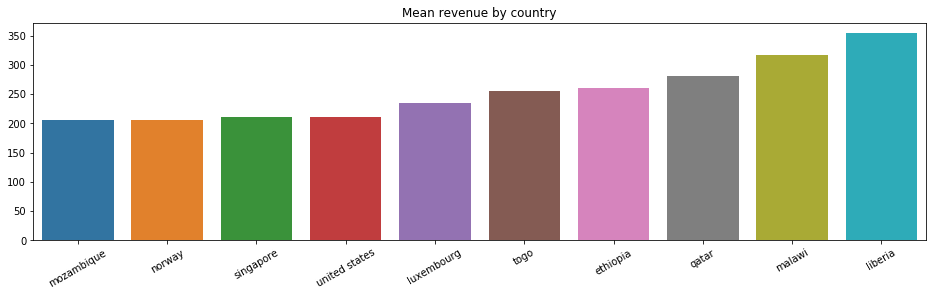

In [4]:
country_revenue = dataset.groupby("Country")["revenue"].mean()
country_revenue = country_revenue.sort_values()[-10:]
plt.title("Mean revenue by country")
barplot = seaborn.barplot(country_revenue.index.values, country_revenue.values)
_ = barplot.set_xticklabels(country_revenue.index.values, rotation=30)
plt.show()

<p>
    Ok ! Lets unravel the code above line by line.
<ul>
    <li>
            The first line groups all the repos by country and computes the mean value of the
            <code>revenue</code> feature (our target)
    </li>
    <li>
        The following line sorts the countries by ascending mean value and only keeps the 10 first values
    </li>
    <li>
        The third line sets a title to the figure and the fourth draws a bar plot with <code>gbCountry.index.values</code> as keys and
        <code>gbCountry.values</code> as values
    </li>
    <li>
        The x labels (<code>gbCountry.index.values</code>) are rotated for aestethics purposes
    </li>
    <li>
        Finaly, the figure is plotted
    </li>
</ul>
</p>
<p>
    And Voilà ! Our first insight. We now know that a correlation may exist between the country and the target.
</p>
<p>
    What we just did is the bread and butter of a Data Science project : highlighting correlations to perform a prediction.   
</p>
<p>
    Also, you may find the results quiet surpising. But bear in mind that it is just a average, and the subsample is really small in some cases (their is only one Liberian buyer in the data set).
</p>

<h3> Insight - quantitative feature</h3>
<p>
    The same goes now with numerical features : in the last cells, the data set was splitted in <em>groups</em> or <em>subsamples</em> sharing a common <em>feature</em>. The target was then studied in each <em>subsample</em>. For continuous or numerical values, it goes the same way : we will simply plot (or in our case more specifically <em>scatter</em>) how our target behaves with regards to a specific feature - in this case, the <code>GDP_cap</code>
</p>

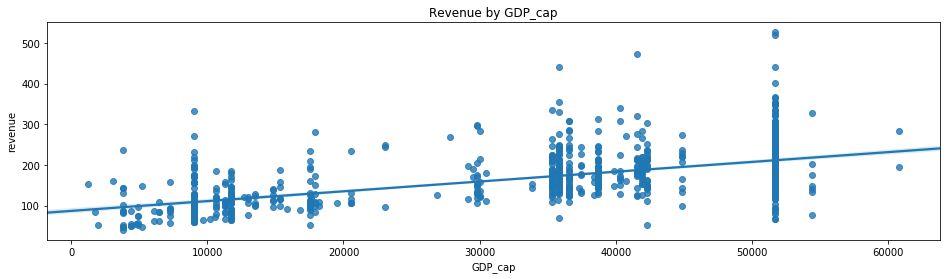

In [5]:
plt.title("Revenue by GDP_cap")
subsample = dataset.sample(n=1000)
seaborn.regplot(subsample["GDP_cap"], subsample["revenue"])

<p>
    The figure above may lead us to think that heir is a <em>positive</em> relation between the <code>GDP_cap</code> and the <code>revenue</code> : the greater is the first variables the greater is the second one.
</p>






<hr>
<h1 style="text-align:center; color:orange">YOUR TURN</h1>
<hr>

In [7]:
print("aa")

aa


<mark><b>Exercice A</b> Draw a scatter plot of the revenue by the price of the first item pruchased (the feature is named <code>price_first_item_purchased</code>)</mark>

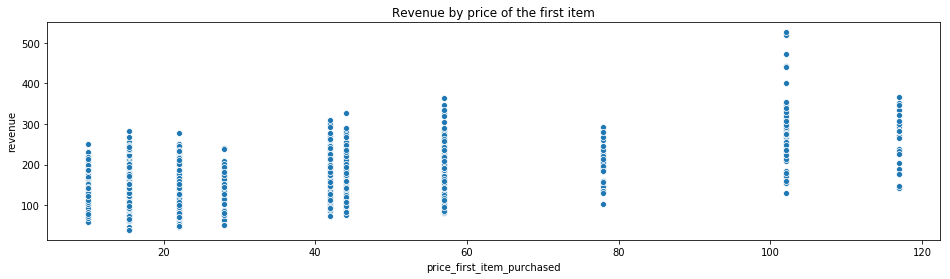

In [8]:
plt.title("Revenue by price of the first item")
seaborn.scatterplot(subsample["price_first_item_purchased"], subsample["revenue"])

In [10]:
aaaa

NameError: name 'aaaa' is not defined

<mark><b>Exercice B</b> Give some statistics about this column <code>price_first_item_purchased</code> (min, max, etc.)</mark>

In [9]:
subsample['price_first_item_purchased'].describe()

count    1000.000000
mean       39.794500
std        25.974944
min        10.000000
25%        22.000000
50%        42.000000
75%        44.000000
max       117.000000
Name: price_first_item_purchased, dtype: float64

<mark><b> Exercice C</b> Are you able to give us the average price of the first purchased item for people having visited 8 pages ?</mark>

In [ ]:
dataset[dataset['pages_visited'] == 8]['price_first_item_purchased'].mean()